<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/control_altura_tanque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Control de flujo en la entrada de tanque

Nombre: Juan Manuel

Fecha: 21 de diciembre del 2020

In [ ]:
install.packages("deSolve")
library(deSolve)
install.packages("ggplot2")
library(ggplot2)

Función para controlar el flujo en la entrada

In [4]:
qin <- function(t,t1,t2) {
  if(t > t1 & t < t2) {
    qin = 0.15
  }
  else {
    qin = 0
  }
  return(qin)
}

Modelo del tanque

In [12]:
tank <- function(times, state, parms) {
  with(as.list(c(parms, state)), {

    # Flujo en la entrada
    qin = qin(t = times, t1 = t1,t2 = t2)

    # Balance de materia
    dhdt = qin/A - Cv*sqrt(h)/A

    return(list(c(dhdt), qin = qin))
  })
}

Dar valor a los parámteros (incluyendo el tiempo para el flujo)

In [6]:
p <- c(Cv=0.1,A =1.0,t1 =20,t2=40)

Condiciones iniciales

In [7]:
s <- c(h = 0)

Tiempo de integración

In [10]:
t <- seq(0,60,len = 1001)

Invocar integrador 

In [13]:
out <- ode(y = s, times = t, func = tank, parms = p, method = "rk4")

Mostrar resultados 

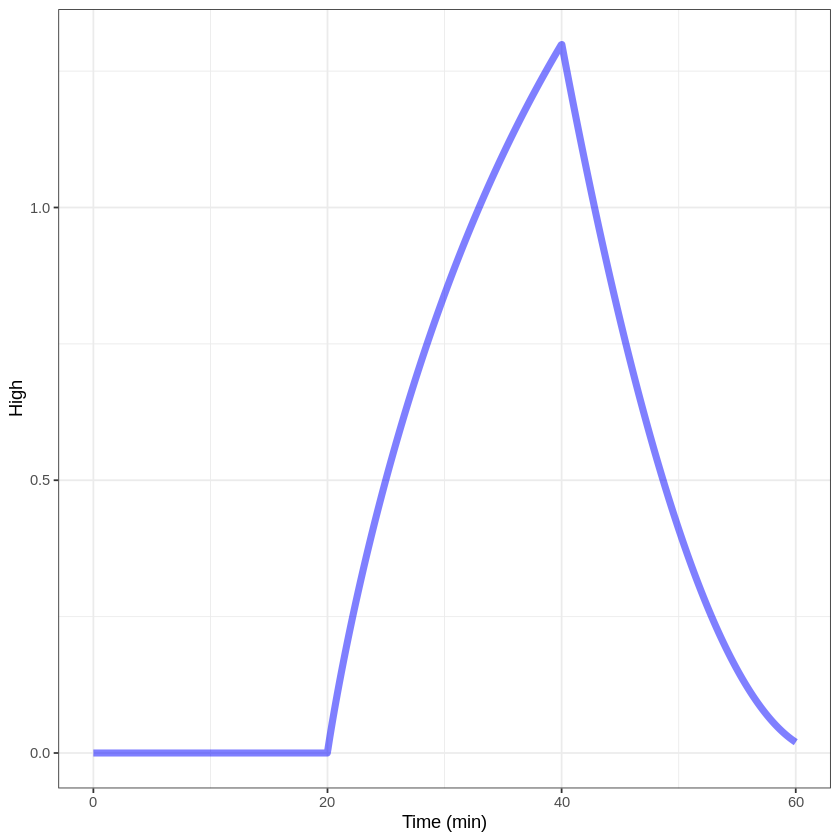

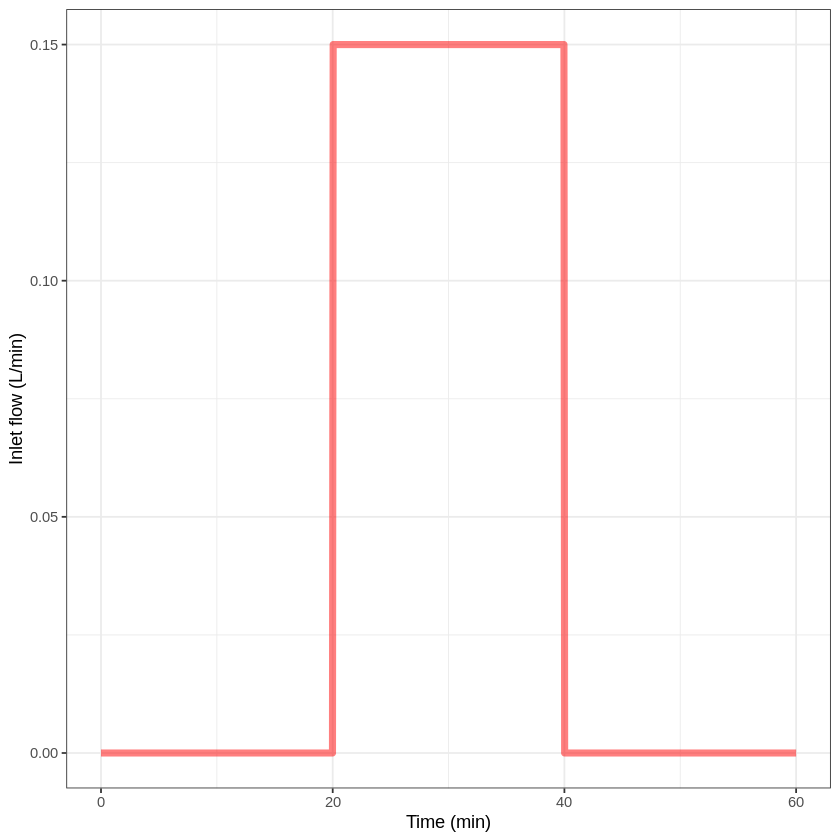

In [14]:
data <- as.data.frame(out)

ggplot(data,aes(time, h)) +
        geom_line(color = "blue", lwd = 2, alpha = 0.5) +
        xlab("Time (min)") +
        ylab("High") +
        theme_bw()

ggplot(data,aes(time, qin)) +
        geom_line(color = "red", lwd = 2, alpha = 0.5) +
        xlab("Time (min)") +
        ylab("Inlet flow (L/min)") +
        theme_bw()